In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report



In [38]:
df=pd.read_csv("/content/df_encoded.csv")
df


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062,1,1,0,0.00000,0,18,12,3,13,396,3,1,4,11,False,97.010000
1,73063,1,1,1,0.00000,0,18,12,3,13,396,3,1,4,11,False,97.010000
2,73064,1,1,2,0.00000,0,18,12,3,13,396,3,1,4,11,False,97.010000
3,73065,1,1,3,172.00000,0,18,12,3,13,396,3,1,4,11,False,97.010000
4,73066,1,1,4,0.00000,0,18,12,3,13,396,3,1,4,11,False,97.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297885,70,25,28,279.16998,0,20,13,3,1,2202,3,1,4,45,False,64.077912
322043,1297886,70,25,29,121.94100,0,20,13,3,1,2202,3,1,4,45,False,64.077912
322044,1297887,70,25,30,105.00000,0,20,13,3,1,2202,3,1,4,45,False,64.077912
322045,1297888,70,25,31,0.00000,0,20,13,3,1,2202,3,1,4,45,False,64.077912


In [41]:
target_column = 'sales'
column_order = [col for col in df.columns if col != target_column] + [target_column]
df= df[column_order]
df


,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,sales
0,73062,1,1,0,0,18,12,3,13,396,3,1,4,11,False,97.010000,0.00000
1,73063,1,1,1,0,18,12,3,13,396,3,1,4,11,False,97.010000,0.00000
2,73064,1,1,2,0,18,12,3,13,396,3,1,4,11,False,97.010000,0.00000
3,73065,1,1,3,0,18,12,3,13,396,3,1,4,11,False,97.010000,172.00000
4,73066,1,1,4,0,18,12,3,13,396,3,1,4,11,False,97.010000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297885,70,25,28,0,20,13,3,1,2202,3,1,4,45,False,64.077912,279.16998
322043,1297886,70,25,29,0,20,13,3,1,2202,3,1,4,45,False,64.077912,121.94100
322044,1297887,70,25,30,0,20,13,3,1,2202,3,1,4,45,False,64.077912,105.00000
322045,1297888,70,25,31,0,20,13,3,1,2202,3,1,4,45,False,64.077912,0.00000


In [42]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
y_train_class = (y_train >= 0.5).astype(int)
y_test_class = (y_test >= 0.5).astype(int)
y_test

,sales
126263,300.000
172108,18.000
170862,5.000
233825,67.000
326,32.000
...,...
117726,898.000
222848,30.809
38519,232.000
78908,171.000


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train_class)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test_class, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7692904828442788


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
y_train_class = (y_train >= 0.5).astype(int)
y_test_class = (y_test >= 0.5).astype(int)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train_scaled, y_train_class)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test_class, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7697


In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_scaled, y_train_class)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test_class, y_pred)
print(f"Accuracy  of Random Forest: {accuracy:.4f}")


Accuracy  of Random Forest: 0.9109


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Paths
TRAIN_CSV = r"D:\DEPI\CIS project\Train.csv"
TEST_CSV  = r"D:\DEPI\CIS project\Test.csv"
SUB_CSV   = r"D:\DEPI\CIS project\Submission.csv"

# 1. Load raw data
train = pd.read_csv(TRAIN_CSV, parse_dates=["date"])
test  = pd.read_csv(TEST_CSV,  parse_dates=["date"])
sub   = pd.read_csv(SUB_CSV)

# 2. Filter one series (store 1, family "BEVERAGES")
condition = "store_nbr == 1 and family == 'BEVERAGES'"
train = train.query(condition)
test  = test.query(condition)

# 3. Set date index and sort
train = train.sort_values("date").set_index("date")
test  = test.sort_values("date").set_index("date")

# 4. Remove duplicate dates
train = train[~train.index.duplicated(keep='first')]
test  = test[~test.index.duplicated(keep='first')]

# 5. Enforce daily frequency and handle missing values
train = train.asfreq("D").interpolate(method="linear").fillna(0)  # Linear interpolation for missing sales

# 6. Enhanced calendar features
for df in (train, test):
    df["day"]        = df.index.day
    df["dow"]        = df.index.dayofweek
    df["is_weekend"] = df["dow"].isin([5, 6]).astype(int)
    df["woy"]        = df.index.isocalendar().week
    df["month"]      = df.index.month
    df["quarter"]    = df.index.quarter
    df["year"]       = df.index.year
    # Fourier terms for seasonality
    df["sin_month"]  = np.sin(2 * np.pi * df["month"] / 12)
    df["cos_month"]  = np.cos(2 * np.pi * df["month"] / 12)

# 7. Promotion features
train["onpromotion"] = train["onpromotion"].fillna(0).astype(int)
test["onpromotion"]  = test["onpromotion"].fillna(0).astype(int)
# Interaction term: promotion on weekends
train["promo_weekend"] = train["onpromotion"] * train["is_weekend"]
test["promo_weekend"]  = test["onpromotion"] * test["is_weekend"]

# 8. Holiday features (assuming 'description' column indicates holidays)
train["is_holiday"] = train["description"].str.contains("Holiday|Navidad", case=False, na=False).astype(int)
test["is_holiday"]  = test["description"].str.contains("Holiday|Navidad", case=False, na=False).astype(int)

# 9. Lag, rolling, and difference features on train
lags    = [1, 7, 14, 28]  # Daily, weekly, bi-weekly, monthly
windows = [7, 14, 28]     # Rolling windows

for lag in lags:
    train[f"lag_{lag}"] = train["sales"].shift(lag)

for w in windows:
    train[f"roll_mean_{w}"] = train["sales"].rolling(window=w, min_periods=1).mean()
    train[f"roll_std_{w}"]  = train["sales"].rolling(window=w, min_periods=1).std()

# Difference feature (trend capture)
train["diff_1"] = train["sales"].diff(1)

# 10. Initialize test features with last train values
for lag in lags:
    test[f"lag_{lag}"] = np.nan
for w in windows:
    test[f"roll_mean_{w}"] = np.nan
    test[f"roll_std_{w}"]  = np.nan
test["diff_1"] = np.nan

first_idx = test.index.min()
for lag in lags:
    test.at[first_idx, f"lag_{lag}"] = train["sales"].iloc[-lag]
for w in windows:
    test.at[first_idx, f"roll_mean_{w}"] = train["sales"].rolling(w).mean().iloc[-1]
    test.at[first_idx, f"roll_std_{w}"]  = train["sales"].rolling(w).std().iloc[-1]
test = test.ffill().fillna(0)  # Forward fill test features

# 11. Scaling numeric features
scaler = StandardScaler()
numeric_cols = ["sales", "onpromotion"] + [f"lag_{lag}" for lag in lags] + \
               [f"roll_mean_{w}" for w in windows] + [f"roll_std_{w}" for w in windows] + ["diff_1"]

train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols]  = scaler.transform(test[numeric_cols])

# 12. Train/validation split (rolling window approach)
train_end = "2017-06-30"
val_end   = "2017-07-31"  # One month validation for simplicity

train_set = train.loc[:train_end].dropna()
val_set   = train.loc[train_end:val_end].dropna()
test_set  = test.copy()

# 13. Export numeric-only Parquet
train_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\train_processed.parquet")
val_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\val_processed.parquet")
test_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\test_processed.parquet")

print("Enhanced preprocessing complete.")

C:\Users\user\AppData\Local\Temp\ipykernel_35084\1209105650.py:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test  = pd.read_csv(TEST_CSV,  parse_dates=["date"])
C:\Users\user\AppData\Local\Temp\ipykernel_35084\1209105650.py:29: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train = train.asfreq("D").interpolate(method="linear").fillna(0)  # Linear interpolation for missing sales


KeyError: "['sales'] not in index"

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Paths
TRAIN_CSV = r"D:\DEPI\CIS project\Train.csv"
TEST_CSV  = r"D:\DEPI\CIS project\Test.csv"
SUB_CSV   = r"D:\DEPI\CIS project\Submission.csv"

# 1. Load raw data
train = pd.read_csv(TRAIN_CSV, parse_dates=["date"])
test  = pd.read_csv(TEST_CSV,  parse_dates=["date"])
sub   = pd.read_csv(SUB_CSV)

# 2. Filter one series (store 1, family "BEVERAGES")
condition = "store_nbr == 1 and family == 'BEVERAGES'"
train = train.query(condition)
test  = test.query(condition)

# 3. Set date index and sort
train = train.sort_values("date").set_index("date")
test  = test.sort_values("date").set_index("date")

# 4. Remove duplicate dates
train = train[~train.index.duplicated(keep='first')]
test  = test[~test.index.duplicated(keep='first')]

# 5. Enforce daily frequency and handle missing values
train = train.asfreq("D").interpolate(method="linear").fillna(0)  # Linear interpolation for missing sales

# 6. Enhanced calendar features
for df in (train, test):
    df["day"]        = df.index.day
    df["dow"]        = df.index.dayofweek
    df["is_weekend"] = df["dow"].isin([5, 6]).astype(int)
    df["woy"]        = df.index.isocalendar().week
    df["month"]      = df.index.month
    df["quarter"]    = df.index.quarter
    df["year"]       = df.index.year
    # Fourier terms for seasonality
    df["sin_month"]  = np.sin(2 * np.pi * df["month"] / 12)
    df["cos_month"]  = np.cos(2 * np.pi * df["month"] / 12)

# 7. Promotion features
train["onpromotion"] = train["onpromotion"].fillna(0).astype(int)
test["onpromotion"]  = test["onpromotion"].fillna(0).astype(int)
# Interaction term: promotion on weekends
train["promo_weekend"] = train["onpromotion"] * train["is_weekend"]
test["promo_weekend"]  = test["onpromotion"] * test["is_weekend"]

# 8. Holiday features (assuming 'description' column indicates holidays)
train["is_holiday"] = train["description"].str.contains("Holiday|Navidad", case=False, na=False).astype(int)
test["is_holiday"]  = test["description"].str.contains("Holiday|Navidad", case=False, na=False).astype(int)

# 9. Lag, rolling, and difference features on train
lags    = [1, 7, 14, 28]  # Daily, weekly, bi-weekly, monthly
windows = [7, 14, 28]     # Rolling windows

for lag in lags:
    train[f"lag_{lag}"] = train["sales"].shift(lag)

for w in windows:
    train[f"roll_mean_{w}"] = train["sales"].rolling(window=w, min_periods=1).mean()
    train[f"roll_std_{w}"]  = train["sales"].rolling(window=w, min_periods=1).std()

# Difference feature (trend capture)
train["diff_1"] = train["sales"].diff(1)

# 10. Initialize test features with last train values
for lag in lags:
    test[f"lag_{lag}"] = np.nan
for w in windows:
    test[f"roll_mean_{w}"] = np.nan
    test[f"roll_std_{w}"]  = np.nan
test["diff_1"] = np.nan

first_idx = test.index.min()
for lag in lags:
    test.at[first_idx, f"lag_{lag}"] = train["sales"].iloc[-lag]
for w in windows:
    test.at[first_idx, f"roll_mean_{w}"] = train["sales"].rolling(w).mean().iloc[-1]
    test.at[first_idx, f"roll_std_{w}"]  = train["sales"].rolling(w).std().iloc[-1]
test = test.ffill().fillna(0)  # Forward fill test features

# 11. Scaling numeric features
scaler = StandardScaler()
numeric_cols = ["sales", "onpromotion"] + [f"lag_{lag}" for lag in lags] + \
               [f"roll_mean_{w}" for w in windows] + [f"roll_std_{w}" for w in windows] + ["diff_1"]

train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols]  = scaler.transform(test[numeric_cols])

# 12. Train/validation split (rolling window approach)
train_end = "2017-06-30"
val_end   = "2017-07-31"  # One month validation for simplicity

train_set = train.loc[:train_end].dropna()
val_set   = train.loc[train_end:val_end].dropna()
test_set  = test.copy()

# 13. Export numeric-only Parquet
train_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\train_processed.parquet")
val_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\val_processed.parquet")
test_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\test_processed.parquet")

print("Enhanced preprocessing complete.")

C:\Users\user\AppData\Local\Temp\ipykernel_35084\1209105650.py:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test  = pd.read_csv(TEST_CSV,  parse_dates=["date"])
C:\Users\user\AppData\Local\Temp\ipykernel_35084\1209105650.py:29: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train = train.asfreq("D").interpolate(method="linear").fillna(0)  # Linear interpolation for missing sales


KeyError: "['sales'] not in index"

In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import psutil
import os
print(f"XGBoost version: {xgb.__version__}")
print(f"XGBoost module path: {xgb.__file__}")

# Define file paths
TRAIN_CSV = r"D:\DEPI\CIS project\Train.csv"
TEST_CSV  = r"D:\DEPI\CIS project\Test.csv"
SUB_CSV   = r"D:\DEPI\CIS project\Submission.csv"

# Function to print memory usage
def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"Memory usage: {mem_info.rss / 1024**2:.2f} MB")

XGBoost version: 2.1.3
XGBoost module path: c:\Users\user\Anaconda3\lib\site-packages\xgboost\__init__.py


In [3]:
# Cell 2: Load and Parse Data
print("Loading data...")
train = pd.read_csv(TRAIN_CSV)
test = pd.read_csv(TEST_CSV)
sub = pd.read_csv(SUB_CSV)

# Parse dates (train: YYYY-MM-DD, test: DD-MM-YYYY)
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d', errors='coerce')
test['date'] = pd.to_datetime(test['date'], format='%d-%m-%Y', errors='coerce')

# Optimize dtypes
train['store_nbr'] = train['store_nbr'].astype('int32')
train['onpromotion'] = train['onpromotion'].astype('int32')
train['sales'] = train['sales'].astype('float32')
test['store_nbr'] = test['store_nbr'].astype('int32')
test['onpromotion'] = test['onpromotion'].astype('int32')

# Check for invalid dates
print("Train NaT dates:", train['date'].isna().sum())
print("Test NaT dates:", test['date'].isna().sum())

# Drop rows with invalid dates
train = train.dropna(subset=['date'])
test = test.dropna(subset=['date'])

# Ensure train is not empty
if train.empty:
    raise ValueError("Train DataFrame is empty after dropping NaT dates. Check date format in TRAIN_CSV.")

print_memory_usage()

Loading data...
Train NaT dates: 0
Test NaT dates: 0
Memory usage: 204.65 MB


In [4]:
# Cell 3: Prepare Data
print("Preparing data...")
train['is_train'] = 1
test['is_train'] = 0
combined = pd.concat([train, test], ignore_index=False)

# Sort by store_nbr, family, date
combined = combined.sort_values(['store_nbr', 'family', 'date'])

# Aggregate duplicates
agg_dict = {
    'sales': 'sum',
    'onpromotion': 'sum',
    'id': 'first',
    'city': 'first',
    'state': 'first',
    'type_x': 'first',
    'cluster': 'first',
    'transactions': 'first',
    'type_y': 'first',
    'locale': 'first',
    'locale_name': 'first',
    'description': 'first',
    'transferred': 'first',
    'dcoilwtico': 'first',
    'Unnamed: 17': 'first',
    'is_train': 'first'
}
combined = combined.groupby(['store_nbr', 'family', 'date']).agg(agg_dict).reset_index()

# Optimize dtypes
combined['store_nbr'] = combined['store_nbr'].astype('int32')
combined['onpromotion'] = combined['onpromotion'].astype('int32')
combined['sales'] = combined['sales'].astype('float32')
combined['is_train'] = combined['is_train'].astype('int8')

# Set MultiIndex
combined = combined.set_index(['store_nbr', 'family', 'date'])

# Verify columns and index
print("Columns after set_index:", combined.columns.tolist())
print("Index names:", combined.index.names)
print("Duplicate index entries:", combined.index.duplicated().sum())
print_memory_usage()

Preparing data...
Columns after set_index: ['sales', 'onpromotion', 'id', 'city', 'state', 'type_x', 'cluster', 'transactions', 'type_y', 'locale', 'locale_name', 'description', 'transferred', 'dcoilwtico', 'Unnamed: 17', 'is_train']
Index names: ['store_nbr', 'family', 'date']
Duplicate index entries: 0
Memory usage: 244.60 MB


In [4]:
# Remove duplicate dates within each (store_nbr, family) series, keeping first
combined = combined[~combined.index.duplicated(keep='first')]

In [5]:
# Cell 4: Enforce Daily Frequency and Handle Missing Values
def process_group(group):
    group = group.reset_index(level=['store_nbr', 'family'])
    group.index = pd.to_datetime(group.index, errors='coerce')
    group = group[~group.index.duplicated(keep='first')]
    group = group.asfreq('D').infer_objects(copy=False)
    group['sales'] = group['sales'].interpolate(method='linear').fillna(0).astype('float32')
    group['onpromotion'] = group['onpromotion'].fillna(0).astype('int32')
    for col in group.columns:
        if col not in ['sales', 'onpromotion']:
            group[col] = group[col].fillna(method='ffill').fillna(group[col].iloc[0] if not group[col].isna().all() else 0)
    group = group.drop(columns=['store_nbr', 'family'], errors='ignore')
    return group

print("Processing groups...")
combined = combined.groupby(['store_nbr', 'family']).apply(process_group)
combined = combined.reset_index().set_index(['store_nbr', 'family', 'date'])

# Debug: Check date range
print("Combined date range:", combined.index.get_level_values('date').min(), "to", 
      combined.index.get_level_values('date').max())
print("Combined rows:", len(combined))
print_memory_usage()

Processing groups...


C:\Users\user\AppData\Local\Temp\ipykernel_32700\3456238258.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group[col] = group[col].fillna(method='ffill').fillna(group[col].iloc[0] if not group[col].isna().all() else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_32700\3456238258.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[col] = group[col].fillna(method='ffill').fillna(group[col].iloc[0] if not group[col].isna().all() else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_32700\3456238258.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group[col] = group[col].fillna(method='

Combined date range: 2013-01-01 00:00:00 to 2017-08-24 00:00:00
Combined rows: 2729610
Memory usage: 612.51 MB


In [6]:
# Cell 5: Add Calendar Features
print("Adding calendar features...")
combined = combined.reset_index()
combined['day'] = combined['date'].dt.day.astype('int8')
combined['dow'] = combined['date'].dt.dayofweek.astype('int8')
combined['is_weekend'] = combined['dow'].isin([5, 6]).astype('int8')
combined['woy'] = combined['date'].dt.isocalendar().week.astype('int8')
combined['month'] = combined['date'].dt.month.astype('int8')
combined['quarter'] = combined['date'].dt.quarter.astype('int8')
combined['year'] = combined['date'].dt.year.astype('int16')
combined['sin_month'] = np.sin(2 * np.pi * combined['month'] / 12).astype('float32')
combined['cos_month'] = np.cos(2 * np.pi * combined['month'] / 12).astype('float32')
combined = combined.set_index(['store_nbr', 'family', 'date'])
print_memory_usage()

Adding calendar features...
Memory usage: 655.84 MB


In [7]:
# Cell 5: Add Calendar Features
# Reset index temporarily to create calendar features
combined = combined.reset_index()
combined['day'] = combined['date'].dt.day
combined['dow'] = combined['date'].dt.dayofweek
combined['is_weekend'] = combined['dow'].isin([5, 6]).astype(int)
combined['woy'] = combined['date'].dt.isocalendar().week
combined['month'] = combined['date'].dt.month
combined['quarter'] = combined['date'].dt.quarter
combined['year'] = combined['date'].dt.year
combined['sin_month'] = np.sin(2 * np.pi * combined['month'] / 12)
combined['cos_month'] = np.cos(2 * np.pi * combined['month'] / 12)
# Restore MultiIndex
combined = combined.set_index(['store_nbr', 'family', 'date'])

In [7]:
# Cell 6: Process Promotion Features
combined['promo_weekend'] = (combined['onpromotion'] * combined['is_weekend']).astype('int8')


In [8]:
# Cell 7: Create Holiday Indicator
combined['description'] = combined['description'].astype(str)
combined['is_holiday'] = combined['description'].str.contains(
    "Holiday|Navidad|Carnaval", case=False, na=False).astype('int8')

In [9]:
# Cell 8: Generate Lag Features
lags = [1, 7, 14, 28]
for lag in lags:
    combined[f'lag_{lag}'] = combined.groupby(['store_nbr', 'family'])['sales'].shift(lag).astype('float32')


In [10]:
# Cell 9: Generate Rolling Features
windows = [7, 14, 28]
for w in windows:
    combined[f'roll_mean_{w}'] = combined.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(
        window=w, min_periods=1).mean().astype('float32')
    combined[f'roll_std_{w}'] = combined.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(
        window=w, min_periods=1).std().astype('float32')

In [11]:
# Cell 10: Generate Difference Feature
combined['diff_1'] = combined.groupby(['store_nbr', 'family'])['sales'].diff(1).astype('float32')
print_memory_usage()

Memory usage: 797.18 MB


In [12]:
# Cell 11: Encode Categorical Features
le_store = LabelEncoder()
le_family = LabelEncoder()
combined['store_nbr_encoded'] = le_store.fit_transform(combined.index.get_level_values('store_nbr')).astype('int8')
combined['family_encoded'] = le_family.fit_transform(combined.index.get_level_values('family')).astype('int8')

In [13]:
# Cell 12: Scale Features
feature_cols = ['onpromotion', 'promo_weekend', 'is_holiday', 'day', 'dow', 'is_weekend',
                'woy', 'month', 'quarter', 'year', 'sin_month', 'cos_month',
                'store_nbr_encoded', 'family_encoded'] + \
               [f'lag_{lag}' for lag in lags] + \
               [f'roll_mean_{w}' for w in windows] + [f'roll_std_{w}' for w in windows] + ['diff_1']

# Verify feature columns
missing_cols = [col for col in feature_cols if col not in combined.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

scaler = StandardScaler()
combined[feature_cols] = scaler.fit_transform(combined[feature_cols].fillna(0)).astype('float32')
print_memory_usage()

Memory usage: 901.30 MB


In [14]:
# Cell 13: Split Train, Validation, and Test Sets
train_processed = combined[combined['is_train'] == 1].drop(columns=['is_train'])
test_processed = combined[combined['is_train'] == 0].drop(columns=['is_train', 'sales'])

# Debug: Check train_processed
print("Train processed rows:", len(train_processed))
print("Train processed date range:", train_processed.index.get_level_values('date').min(), "to",
      train_processed.index.get_level_values('date').max())

train_end = '2017-07-15'
val_end = '2017-08-15'
train_set = train_processed[train_processed.index.get_level_values('date') <= train_end]
val_set = train_processed[(train_processed.index.get_level_values('date') > train_end) & 
                          (train_processed.index.get_level_values('date') <= val_end)]
val_set = val_set[val_set['sales'].notna()]

# Debug: Check train and validation sets
print("Train set rows:", len(train_set))
print("Validation set rows:", len(val_set))
print("Validation set date range:", val_set.index.get_level_values('date').min(), "to",
      val_set.index.get_level_values('date').max())
if val_set.empty:
    raise ValueError("Validation set is empty. Check date range or NaN handling.")
print_memory_usage()

Train processed rows: 2728800
Train processed date range: 2013-01-01 00:00:00 to 2017-08-23 00:00:00
Train set rows: 2669238
Validation set rows: 55242
Validation set date range: 2017-07-16 00:00:00 to 2017-08-15 00:00:00
Memory usage: 1960.71 MB


In [15]:
# Cell 14: Prepare Model Inputs
X_train = train_set[feature_cols]
y_train = train_set['sales']
X_val = val_set[feature_cols]
y_val = val_set['sales']
X_test = test_processed[feature_cols]

In [17]:
# Cell 15: Train XGBoost Model
print("Training model...")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, 
                             max_depth=6, random_state=42)

try:
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)
except TypeError:
    print("early_stopping_rounds not supported. Using xgb.train fallback.")
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': 0.1,
        'max_depth': 6,
        'random_state': 42
    }
    evals = [(dval, 'validation_0')]
    xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, 
                          early_stopping_rounds=10, verbose_eval=True)
    # Note: xgb.train returns a Booster, not an XGBRegressor
    booster = xgb_model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_model._Booster = booster

y_pred_val = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f'Validation RMSE: {rmse:.4f}')
print_memory_usage()


Training model...
early_stopping_rounds not supported. Using xgb.train fallback.
[0]	validation_0-rmse:1062.84340
[1]	validation_0-rmse:952.55484
[2]	validation_0-rmse:853.54363
[3]	validation_0-rmse:761.29340
[4]	validation_0-rmse:678.64620
[5]	validation_0-rmse:608.13176
[6]	validation_0-rmse:543.70056
[7]	validation_0-rmse:484.83127
[8]	validation_0-rmse:433.01584
[9]	validation_0-rmse:389.35523
[10]	validation_0-rmse:348.22096
[11]	validation_0-rmse:312.54135
[12]	validation_0-rmse:282.00086
[13]	validation_0-rmse:255.49924
[14]	validation_0-rmse:233.96209
[15]	validation_0-rmse:215.57198
[16]	validation_0-rmse:199.75566
[17]	validation_0-rmse:186.57000
[18]	validation_0-rmse:176.45475
[19]	validation_0-rmse:169.08502
[20]	validation_0-rmse:162.85560
[21]	validation_0-rmse:158.39917
[22]	validation_0-rmse:156.90854
[23]	validation_0-rmse:155.51795
[24]	validation_0-rmse:154.00910
[25]	validation_0-rmse:156.28804
[26]	validation_0-rmse:155.93074
[27]	validation_0-rmse:159.48759
[28]

In [18]:
# Cell 16: Generate Test Predictions
print("Generating predictions...")
y_pred_test = xgb_model.predict(X_test)
test_processed['sales'] = y_pred_test
submission = test_processed.reset_index()[['id', 'sales']].merge(sub[['id']], on='id', how='right')
submission['sales'] = submission['sales'].fillna(0).clip(0)
submission.to_csv(r"D:\DEPI\CIS project\submission_xgboost.csv", index=False)
print("Submission file created.")

Generating predictions...
Submission file created.


In [20]:
# Cell 16: Generate Test Predictions
print("Generating predictions...")
y_pred_test = xgb_model.predict(X_test)
test_processed['sales'] = y_pred_test
submission = test_processed.reset_index()[['id', 'sales']].merge(sub[['id']], on='id', how='right')
submission['sales'] = submission['sales'].fillna(0).clip(0)
submission.to_csv(r"D:\DEPI\CIS project\submission_xgboost.csv", index=False)
print("Submission file created.")

Generating predictions...
Submission file created.


In [19]:
# Cell 17: Save Processed Data (Optional)
train_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\train_processed.parquet")
val_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\val_processed.parquet")
test_processed.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\test_processed.parquet")
print("Processed data saved.")
print_memory_usage()

Processed data saved.
Memory usage: 3890.37 MB


In [21]:
# Cell 18: Import ACF/PACF Libraries
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import psutil
import os
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

print(f"XGBoost version: {xgb.__version__}")
print(f"XGBoost module path: {xgb.__file__}")

# Define file paths
TRAIN_CSV = r"D:\DEPI\CIS project\Train.csv"
TEST_CSV = r"D:\DEPI\CIS project\Test.csv"
SUB_CSV = r"D:\DEPI\CIS project\Submission.csv"

# Function to print memory usage
def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"Memory usage: {mem_info.rss / 1024**2:.2f} MB")

# Cell 2: Load and Parse Data
print("Loading data...")
train = pd.read_csv(TRAIN_CSV)
test = pd.read_csv(TEST_CSV)
sub = pd.read_csv(SUB_CSV)

# Parse dates
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d', errors='coerce')
test['date'] = pd.to_datetime(test['date'], format='%d-%m-%Y', errors='coerce')

# Optimize dtypes
train['store_nbr'] = train['store_nbr'].astype('int32')
train['onpromotion'] = train['onpromotion'].astype('int32')
train['sales'] = train['sales'].astype('float32')
test['store_nbr'] = test['store_nbr'].astype('int32')
test['onpromotion'] = test['onpromotion'].astype('int32')

# Check and drop invalid dates
print("Train NaT dates:", train['date'].isna().sum())
print("Test NaT dates:", test['date'].isna().sum())
train = train.dropna(subset=['date'])
test = test.dropna(subset=['date'])

if train.empty:
    raise ValueError("Train DataFrame is empty after dropping NaT dates.")

print_memory_usage()

# Cell 3: Prepare Data
print("Preparing data...")
train['is_train'] = 1
test['is_train'] = 0
combined = pd.concat([train, test], ignore_index=False)

# Sort and aggregate duplicates
combined = combined.sort_values(['store_nbr', 'family', 'date'])
agg_dict = {
    'sales': 'mean',  # Changed to mean to reduce artificial cycles
    'onpromotion': 'sum',
    'id': 'first',
    'city': 'first',
    'state': 'first',
    'type_x': 'first',
    'cluster': 'first',
    'transactions': 'first',
    'type_y': 'first',
    'locale': 'first',
    'locale_name': 'first',
    'description': 'first',
    'transferred': 'first',
    'dcoilwtico': 'first',
    'Unnamed: 17': 'first',
    'is_train': 'first'
}
combined = combined.groupby(['store_nbr', 'family', 'date']).agg(agg_dict).reset_index()

# Optimize dtypes
combined['store_nbr'] = combined['store_nbr'].astype('int32')
combined['onpromotion'] = combined['onpromotion'].astype('int32')
combined['sales'] = combined['sales'].astype('float32')
combined['is_train'] = combined['is_train'].astype('int8')

# Set MultiIndex
combined = combined.set_index(['store_nbr', 'family', 'date'])

print("Columns after set_index:", combined.columns.tolist())
print("Index names:", combined.index.names)
print("Duplicate index entries:", combined.index.duplicated().sum())
print_memory_usage()

# Cell 4: Handle Missing Values
def process_group(group):
    group = group.reset_index(level=['store_nbr', 'family'])
    group.index = pd.to_datetime(group.index, errors='coerce')
    group = group[~group.index.duplicated(keep='first')]
    # Avoid asfreq, use forward fill to preserve gaps
    group['sales'] = group['sales'].ffill().fillna(0).astype('float32')
    group['onpromotion'] = group['onpromotion'].fillna(0).astype('int32')
    for col in group.columns:
        if col not in ['sales', 'onpromotion']:
            group[col] = group[col].ffill().fillna(group[col].iloc[0] if not group[col].isna().all() else 0)
    group = group.drop(columns=['store_nbr', 'family'], errors='ignore')
    return group

print("Processing groups...")
combined = combined.groupby(['store_nbr', 'family']).apply(process_group)
combined = combined.reset_index().set_index(['store_nbr', 'family', 'date'])

print("Combined date range:", combined.index.get_level_values('date').min(), "to",
      combined.index.get_level_values('date').max())
print("Combined rows:", len(combined))
print_memory_usage()

# Cell 5: Add Calendar Features
print("Adding calendar features...")
combined = combined.reset_index()
combined['day'] = combined['date'].dt.day.astype('int8')
combined['dow'] = combined['date'].dt.dayofweek.astype('int8')
combined['is_weekend'] = combined['dow'].isin([5, 6]).astype('int8')
combined['woy'] = combined['date'].dt.isocalendar().week.astype('int8')
combined['month'] = combined['date'].dt.month.astype('int8')
combined['quarter'] = combined['date'].dt.quarter.astype('int8')
combined['year'] = combined['date'].dt.year.astype('int16')
combined['sin_month'] = np.sin(2 * np.pi * combined['month'] / 12).astype('float32')
combined['cos_month'] = np.cos(2 * np.pi * combined['month'] / 12).astype('float32')
combined = combined.set_index(['store_nbr', 'family', 'date'])
print_memory_usage()

# Cell 6: Process Promotion Features
combined['promo_weekend'] = (combined['onpromotion'] * combined['is_weekend']).astype('int8')

# Cell 7: Create Holiday Indicator
combined['description'] = combined['description'].astype(str)
combined['is_holiday'] = combined['description'].str.contains(
    "Holiday|Navidad|Carnaval", case=False, na=False).astype('int8')

# Cell 8: Generate Lag Features
lags = [1, 7, 14, 21, 28]  # Added lag 21 to match original pattern
for lag in lags:
    combined[f'lag_{lag}'] = combined.groupby(['store_nbr', 'family'])['sales'].shift(lag).astype('float32')

# Cell 9: Generate Rolling Features
windows = [7, 14, 21, 28]  # Added window 21
for w in windows:
    combined[f'roll_mean_{w}'] = combined.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(
        window=w, min_periods=1).mean().astype('float32')
    combined[f'roll_std_{w}'] = combined.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(
        window=w, min_periods=1).std().astype('float32')

# Cell 10: Generate Difference Feature
combined['diff_1'] = combined.groupby(['store_nbr', 'family'])['sales'].diff(1).astype('float32')
print_memory_usage()

# Cell 11: Encode Categorical Features
le_store = LabelEncoder()
le_family = LabelEncoder()
combined['store_nbr_encoded'] = le_store.fit_transform(combined.index.get_level_values('store_nbr')).astype('int8')
combined['family_encoded'] = le_family.fit_transform(combined.index.get_level_values('family')).astype('int8')

# Cell 12: Scale Features
feature_cols = ['onpromotion', 'promo_weekend', 'is_holiday', 'day', 'dow', 'is_weekend',
                'woy', 'month', 'quarter', 'year', 'sin_month', 'cos_month',
                'store_nbr_encoded', 'family_encoded'] + \
               [f'lag_{lag}' for lag in lags] + \
               [f'roll_mean_{w}' for w in windows] + [f'roll_std_{w}' for w in windows] + ['diff_1']

missing_cols = [col for col in feature_cols if col not in combined.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

scaler = StandardScaler()
combined[feature_cols] = scaler.fit_transform(combined[feature_cols].fillna(0)).astype('float32')
print_memory_usage()

# Cell 13: Split Train, Validation, and Test Sets
train_processed = combined[combined['is_train'] == 1].drop(columns=['is_train'])
test_processed = combined[combined['is_train'] == 0].drop(columns=['is_train', 'sales'])

print("Train processed rows:", len(train_processed))
print("Train processed date range:", train_processed.index.get_level_values('date').min(), "to",
      train_processed.index.get_level_values('date').max())

train_end = '2017-07-15'
val_end = '2017-08-15'
train_set = train_processed[train_processed.index.get_level_values('date') <= train_end]
val_set = train_processed[(train_processed.index.get_level_values('date') > train_end) & 
                         (train_processed.index.get_level_values('date') <= val_end)]
val_set = val_set[val_set['sales'].notna()]

print("Train set rows:", len(train_set))
print("Validation set rows:", len(val_set))
print("Validation set date range:", val_set.index.get_level_values('date').min(), "to",
      val_set.index.get_level_values('date').max())
if val_set.empty:
    raise ValueError("Validation set is empty.")
print_memory_usage()

# Cell 14: Prepare Model Inputs
X_train = train_set[feature_cols]
y_train = train_set['sales']
X_val = val_set[feature_cols]
y_val = val_set['sales']
X_test = test_processed[feature_cols]

# Cell 15: Train XGBoost Model
print("Training model...")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1,
                             max_depth=6, random_state=42)

try:
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)
except TypeError:
    print("early_stopping_rounds not supported. Using xgb.train fallback.")
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    params = {'objective': 'reg:squarederror', 'learning_rate': 0.1, 'max_depth': 6, 'random_state': 42}
    evals = [(dval, 'validation_0')]
    booster = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_model._Booster = booster

if not xgb_model.__sklearn_is_fitted__():
    raise ValueError("Model is not fitted.")

y_pred_val = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f'Validation RMSE: {rmse:.4f}')
print_memory_usage()

# Cell 16: Generate Test Predictions
print("Generating predictions...")
y_pred_test = xgb_model.predict(X_test)
test_processed['sales'] = y_pred_test
submission = test_processed.reset_index()[['id', 'sales']].merge(sub[['id']], on='id', how='right')
submission['sales'] = submission['sales'].fillna(0).clip(0)
submission.to_csv(r"D:\DEPI\CIS project\submission_xgboost.csv", index=False)
print("Submission file created.")

# Cell 17: Save Processed Data
train_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\train_processed.parquet")
val_set.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\val_processed.parquet")
test_processed.select_dtypes(include=[np.number]).to_parquet(r"D:\DEPI\CIS project\test_processed.parquet")
print("Processed data saved.")
print_memory_usage()

XGBoost version: 2.1.3
XGBoost module path: c:\Users\user\Anaconda3\lib\site-packages\xgboost\__init__.py
Loading data...
Train NaT dates: 0
Test NaT dates: 0
Memory usage: 233.83 MB
Preparing data...
Columns after set_index: ['sales', 'onpromotion', 'id', 'city', 'state', 'type_x', 'cluster', 'transactions', 'type_y', 'locale', 'locale_name', 'description', 'transferred', 'dcoilwtico', 'Unnamed: 17', 'is_train']
Index names: ['store_nbr', 'family', 'date']
Duplicate index entries: 0
Memory usage: 275.86 MB
Processing groups...
Combined date range: 2013-01-01 00:00:00 to 2017-08-24 00:00:00
Combined rows: 293355
Memory usage: 322.28 MB
Adding calendar features...
Memory usage: 331.84 MB
Memory usage: 347.93 MB
Memory usage: 356.30 MB
Train processed rows: 292545
Train processed date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Train set rows: 283635
Validation set rows: 8910
Validation set date range: 2017-07-24 00:00:00 to 2017-08-15 00:00:00
Memory usage: 475.75 MB
Training mode

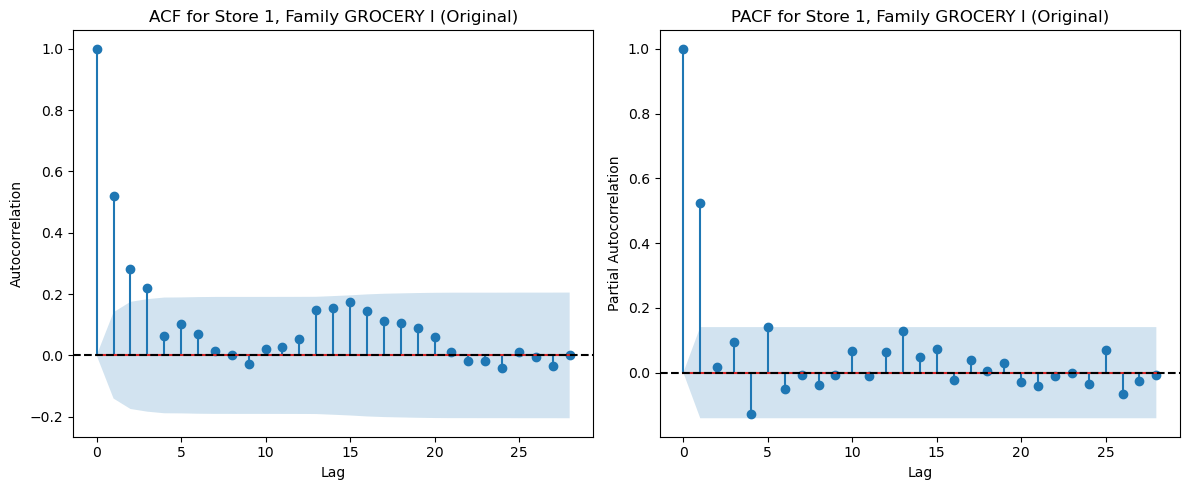

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Load original data
train = pd.read_csv(r"D:\DEPI\CIS project\Train.csv")
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d', errors='coerce')

# Filter for Store 1, Family GROCERY I
series = train[(train['store_nbr'] == 1) & (train['family'] == 'GROCERY I')].sort_values('date').set_index('date')['sales']

# Compute ACF and PACF
n_lags = 28
acf_vals, acf_confint = acf(series.dropna(), nlags=n_lags, alpha=0.05, fft=False)
pacf_vals, pacf_confint = pacf(series.dropna(), nlags=n_lags, alpha=0.05)

# Plot ACF
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(range(len(acf_vals)), acf_vals)
plt.fill_between(range(len(acf_vals)), acf_confint[:, 0] - acf_vals, acf_confint[:, 1] - acf_vals, alpha=0.2)
plt.axhline(0, color='black', linestyle='--')
plt.title('ACF for Store 1, Family GROCERY I (Original)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Plot PACF
plt.subplot(1, 2, 2)
plt.stem(range(len(pacf_vals)), pacf_vals)
plt.fill_between(range(len(pacf_vals)), pacf_confint[:, 0] - pacf_vals, pacf_confint[:, 1] - pacf_vals, alpha=0.2)
plt.axhline(0, color='black', linestyle='--')
plt.title('PACF for Store 1, Family GROCERY I (Original)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

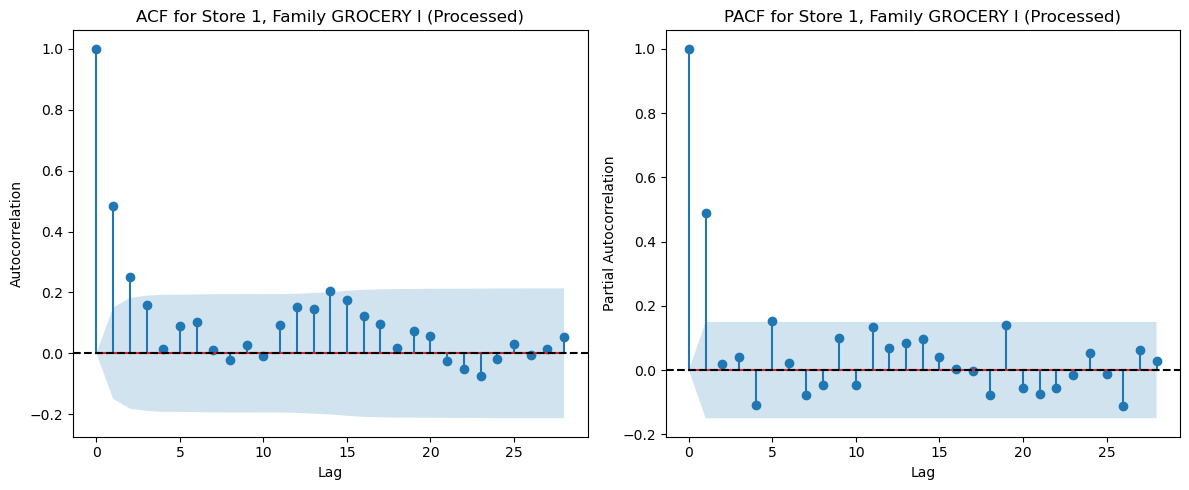

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Load processed data
train_processed = pd.read_parquet(r"D:\DEPI\CIS project\train_processed.parquet")

# Filter for Store 1, Family GROCERY I
series = train_processed.xs((1, 'GROCERY I'), level=['store_nbr', 'family'])['sales']

# Compute ACF and PACF
n_lags = 28
acf_vals, acf_confint = acf(series.dropna(), nlags=n_lags, alpha=0.05, fft=False)
pacf_vals, pacf_confint = pacf(series.dropna(), nlags=n_lags, alpha=0.05)

# Plot ACF
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(range(len(acf_vals)), acf_vals)
plt.fill_between(range(len(acf_vals)), acf_confint[:, 0] - acf_vals, acf_confint[:, 1] - acf_vals, alpha=0.2)
plt.axhline(0, color='black', linestyle='--')
plt.title('ACF for Store 1, Family GROCERY I (Processed)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Plot PACF
plt.subplot(1, 2, 2)
plt.stem(range(len(pacf_vals)), pacf_vals)
plt.fill_between(range(len(pacf_vals)), pacf_confint[:, 0] - pacf_vals, pacf_confint[:, 1] - pacf_vals, alpha=0.2)
plt.axhline(0, color='black', linestyle='--')
plt.title('PACF for Store 1, Family GROCERY I (Processed)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

In [5]:
pip install pmdarima prophet tensorflow joblib scikit-learn matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip uninstall tensorflow


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [6]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from joblib import Parallel, delayed
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

ImportError: Traceback (most recent call last):
  File "c:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
train_set = pd.read_parquet(r"D:\DEPI\CIS project\train_processed.parquet")
val_set = pd.read_parquet(r"D:\DEPI\CIS project\val_processed.parquet")
test_processed = pd.read_parquet(r"D:\DEPI\CIS project\test_processed.parquet")

# Ensure index is set correctly
train_set.index = pd.MultiIndex.from_frame(train_set[['store_nbr', 'family', 'date']])
val_set.index = pd.MultiIndex.from_frame(val_set[['store_nbr', 'family', 'date']])
test_processed.index = pd.MultiIndex.from_frame(test_processed[['store_nbr', 'family', 'date']])

print("Data loaded successfully.")